## KNN Algorithm

In [2]:
# module used
import numpy as np
import pandas as pd

# for ploting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# setting path equall to downloded file 
path ="iris.data"

In [4]:
# assining coloumn name
headernames = ['sepal-length','sapal-width','petal-length','petal-width','class']

In [5]:
#read the given dataset to pandas dataframe
dataset = pd.read_csv(path , names = headernames)
dataset.head()

,sepal-length,sapal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#grouping the data to find mean and median
#helps in identifing how the data is distribution
dataset.groupby('class').agg(['mean','median'])

sepal-length        sapal-width        petal-length         \
                        mean median        mean median         mean median   
class                                                                        
Iris-setosa            5.006    5.0       3.418    3.4        1.464   1.50   
Iris-versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
Iris-virginica         6.588    6.5       2.974    3.0        5.552   5.55   

                petal-width         
                       mean median  
class                               
Iris-setosa           0.244    0.2  
Iris-versicolor       1.326    1.3  
Iris-virginica        2.026    2.0

In [7]:
#finding the variance 
#how the data is deviating from the mean
dataset.groupby('class').agg('std')

,sepal-length,sapal-width,petal-length,petal-width
class,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


In [8]:
#data process will be done through following 
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [9]:
#KNeighborClassifier does not accept string label
#lableEncorder transform into no.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

data visualization

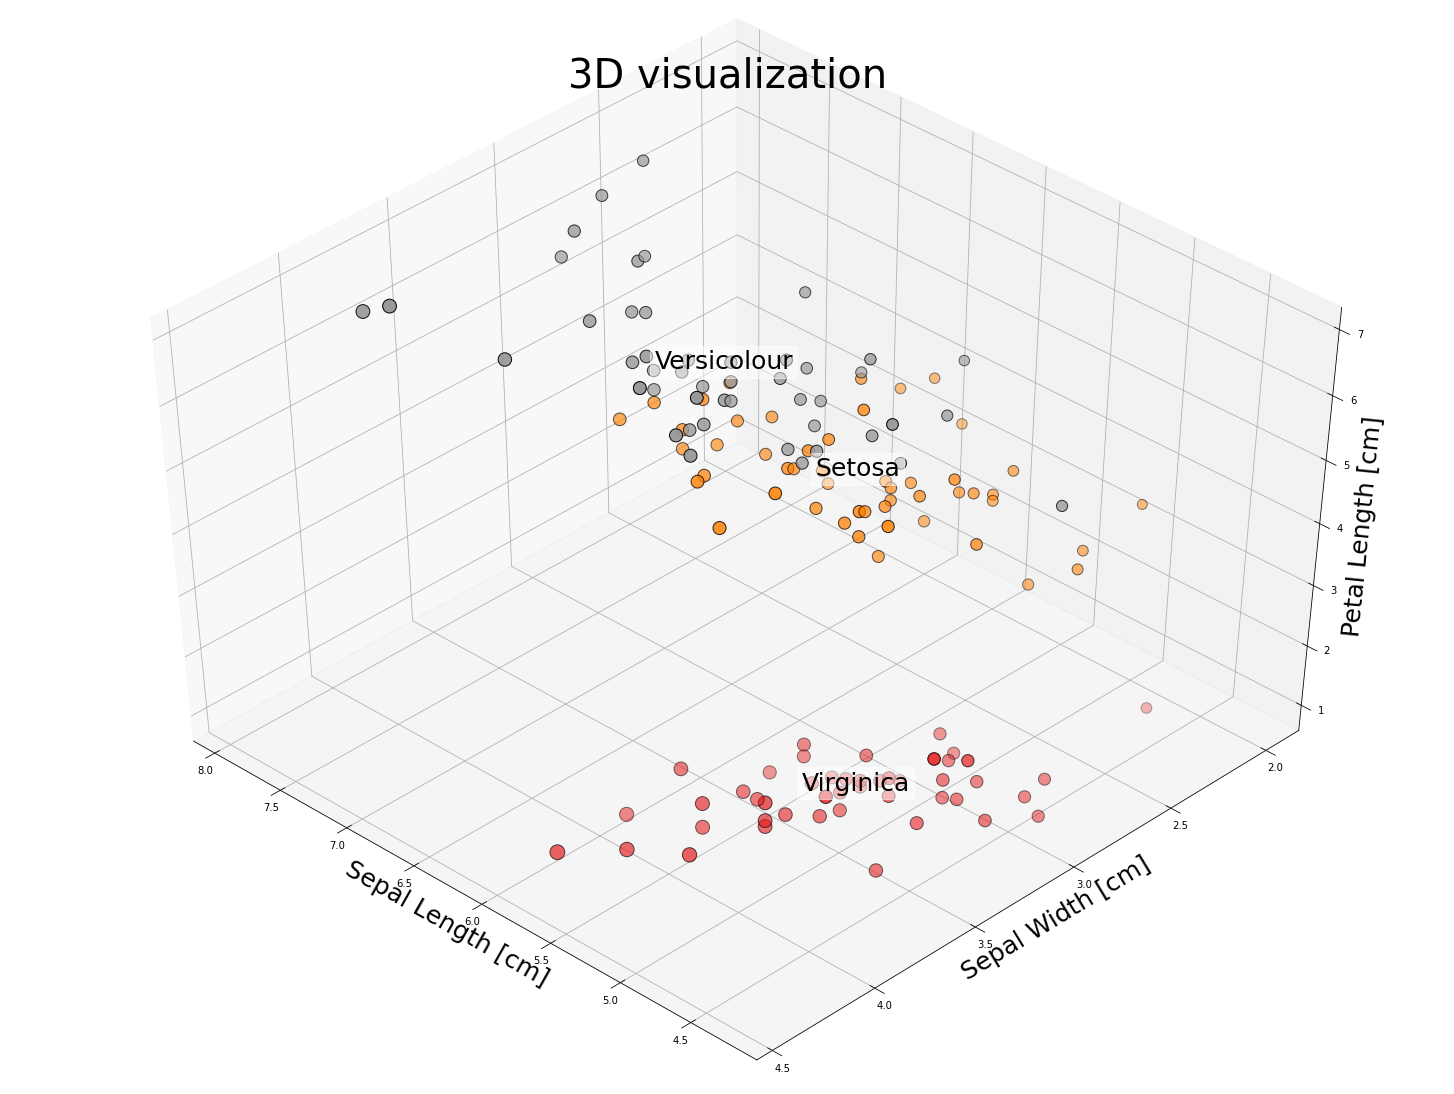

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(20, 15))      #a figure will be created
ax = Axes3D(fig, elev=46, azim=134)        #this provide the alignment of the axis amd elevation
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s = x[:, 1]*50)   #ploting of the points by creating scatterplot

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(x[ y == label, 0].mean(),
              x[ y == label, 1].mean(),
              x[ y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)  #named the marked points

ax.set_title("3D visualization", fontsize=40)        #set title of graph
ax.set_xlabel("Sepal Length [cm]", fontsize=25)      #lable axis
ax.set_ylabel("Sepal Width [cm]", fontsize=25)       #lable axis
ax.set_zlabel("Petal Length [cm]", fontsize=25)      #lable axis

plt.show()

<Figure size 432x288 with 0 Axes>

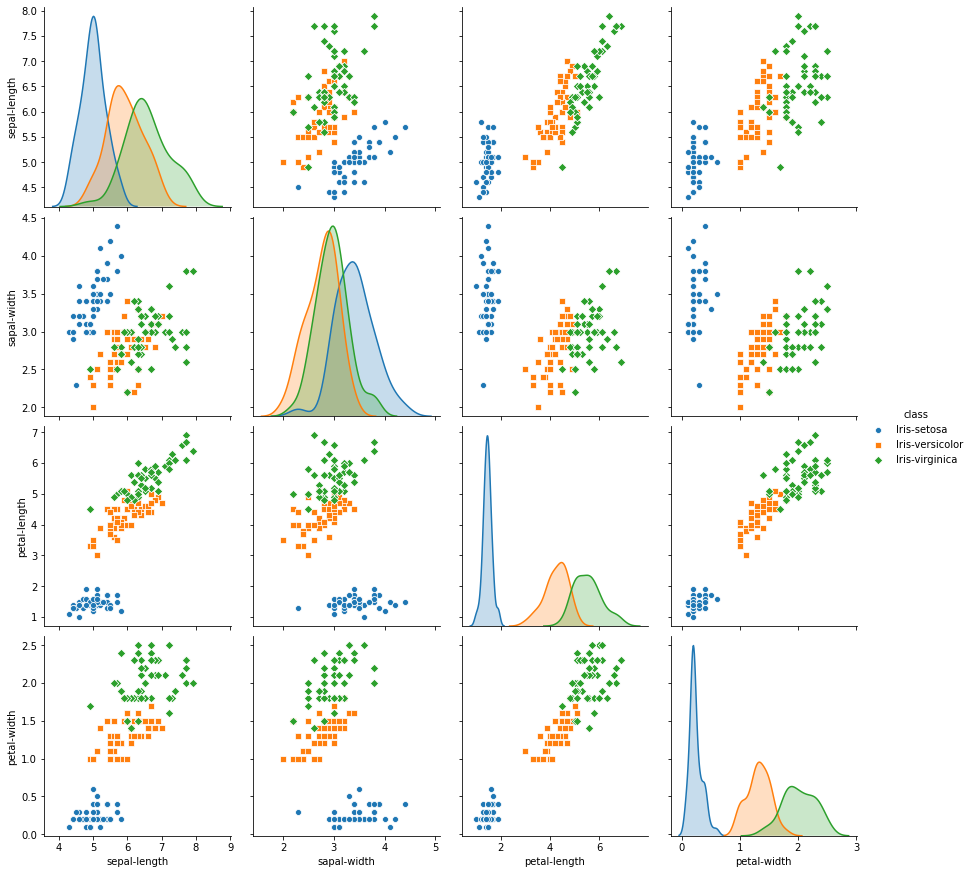

In [11]:
#using seaborn to analize and visualize the data
#usefull to veiw the relationship with multipal variable within the subgroup
plt.figure()
sns.pairplot(data=dataset,hue = "class", height=3, markers=["o", "s", "D"])

In [12]:
#next we will divide the data in trained and test set in 6:4 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size=0.4)

In [13]:
#data scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()          #standardize feature by removing the mean & scaling to unit varience
scaler.fit(x_train)                #compute the mean and std. for later use

x_train = scaler.transform(x_train) #standerdise a dataset along any axis
x_test = scaler.transform(x_test)   #Perform standerdization by scaling and centring

In [14]:
#train the module using Kneighborclassifier class
from sklearn.neighbors import KNeighborsClassifier

#setting k value
clsfir = KNeighborsClassifier(n_neighbors=8)  
clsfir.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [15]:
#pedicting y value on x dateset
y_pred= clsfir.predict(x_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#evaluate quality of output
#the higher the value of diognal element of confusion matrix higer will be the accuracy of prediction 
#diognal element represent the no. of point of pediction lable matching with truth table
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)


Confusion Matrix:
[[22  0  0]
 [ 0 20  1]
 [ 0  1 16]]


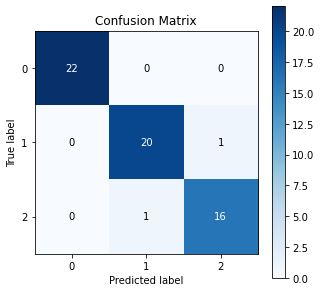

In [17]:
# visualising the confusion matrix
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(5,5))

In [18]:
#build the test report showing the main classification metrices
result1 = classification_report(y_test, y_pred)    
print("Classification Report:",)
print (result1)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.95      0.95      0.95        21
           2       0.94      0.94      0.94        17

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



In [19]:
#accuracy classification score
#match y_test and y_prediction to give accuracy
result2 = accuracy_score(y_test,y_pred)        # metric storing function
print("Accuracy:",result2)

Accuracy: 0.9666666666666667
